In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## use Warnings package to get rid of any future warning ..
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [132]:
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')
len(glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr/*csv')) ## total files we have 

505

In [133]:
company_list = [
    r'individual_stocks_5yr\\AAPL_data.csv' , 
    r'individual_stocks_5yr\\AMZN_data.csv' , 
    r'individual_stocks_5yr\\GOOGL_data.csv' , 
    r'individual_stocks_5yr\\MSFT_data.csv'
    
]

all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = pd.concat([all_data, current_df], ignore_index=True)


In [134]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [135]:
#clean data
all_data.dropna(inplace=True)

In [136]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [137]:
all_data['Daily return(in %)'] = all_data['close'].pct_change() * 100

In [138]:
all_data.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [139]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                5036 non-null   object 
 1   open                5036 non-null   float64
 2   high                5036 non-null   float64
 3   low                 5036 non-null   float64
 4   close               5036 non-null   float64
 5   volume              5036 non-null   int64  
 6   Name                5036 non-null   object 
 7   Daily return(in %)  5035 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 314.9+ KB


In [140]:
all_data.dropna(inplace=True)
all_data.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
volume                0
Name                  0
Daily return(in %)    0
dtype: int64

In [141]:
all_data['date'] =pd.to_datetime(all_data['date'])
all_data.set_index('date', inplace=True)


In [142]:
all_data.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [143]:
all_data['Daily return(in %)'].resample('M').mean()

date
2013-02-28   -1.974845
2013-03-31    0.046094
2013-04-30    0.172806
2013-05-31    0.215385
2013-06-30   -0.110755
                ...   
2017-10-31    0.472329
2017-11-30    0.117156
2017-12-31    0.018567
2018-01-31    0.512658
2018-02-28   -1.168008
Freq: M, Name: Daily return(in %), Length: 61, dtype: float64

In [144]:
googl_data = all_data[all_data['Name'] == 'GOOGL']
googl_data['Daily return(in %)'].resample('M').mean()

msft_data = all_data[all_data['Name'] == 'MSFT']
msft_data['Daily return(in %)'].resample('M').mean()



date
2013-02-28   -6.888537
2013-03-31    0.144205
2013-04-30    0.683519
2013-05-31    0.246776
2013-06-30   -0.041567
                ...   
2017-10-31    0.512129
2017-11-30    0.059533
2017-12-31    0.088517
2018-01-31    0.506318
2018-02-28   -1.127629
Freq: M, Name: Daily return(in %), Length: 61, dtype: float64

<Figure size 2000x1200 with 0 Axes>

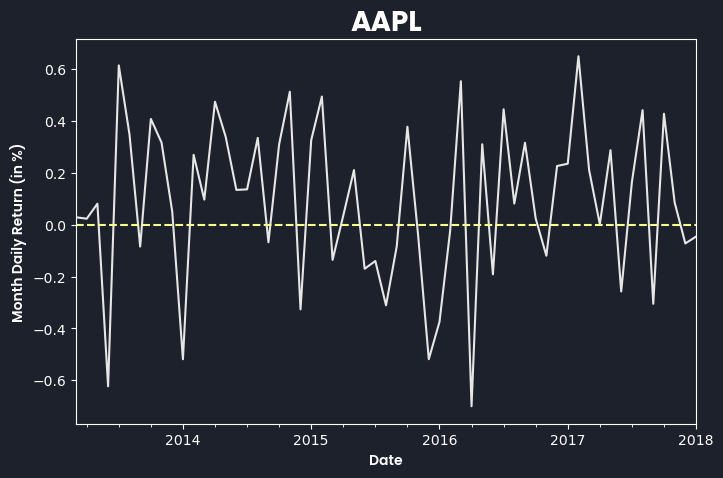

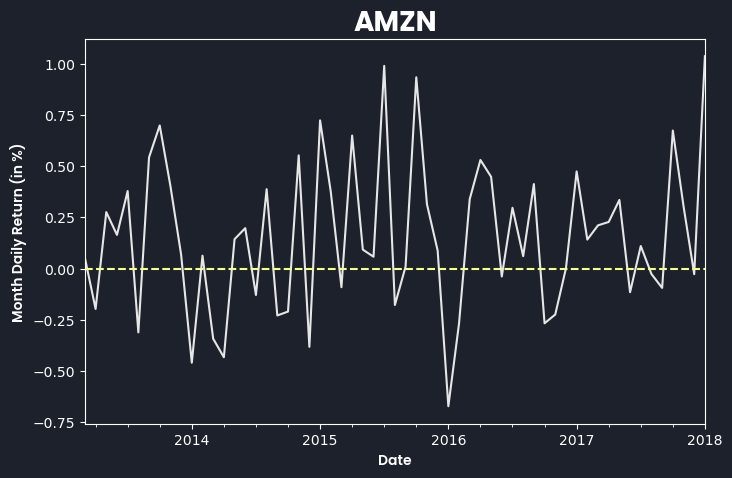

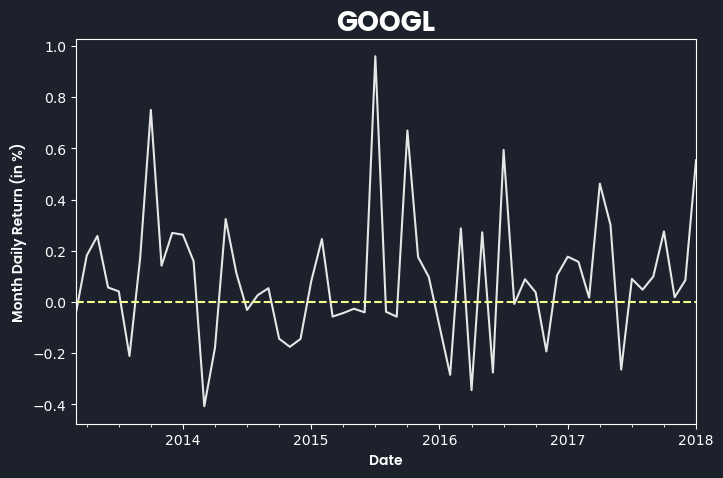

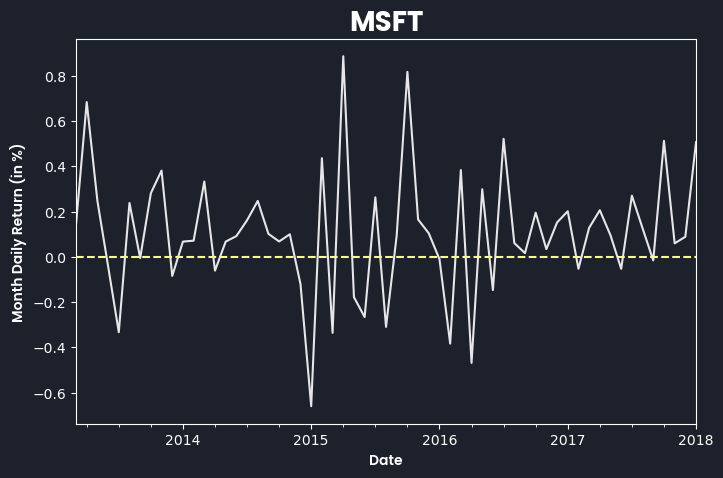

In [226]:
plt.rcParams['figure.facecolor'] = '#1C212B' # set background color of the whole figure
plt.figure(figsize=(20,12))

company_list = all_data['Name'].unique()

for index, company in enumerate(company_list):
    plt.figure(figsize=(8,5))
    ax = all_data[all_data['Name'] == company]['Daily return(in %)'].resample('M').mean().iloc[1:-1].plot(kind='line', color='#E6E6E7')
    ax.axhline(y=0, color='#F6FF8E', linestyle='--')
    plt.title(company, fontdict={'fontsize': 20, 'fontname': 'poppins', 'fontweight': 'bold'})
    plt.gca().set_facecolor('#1C212B')
    plt.xlabel('Date', fontweight='semibold', fontfamily='poppins')
    plt.ylabel('Month Daily Return (in %)', fontweight='semibold', fontfamily='poppins')
    plt.show()


In [168]:
# get the list of all csv files
csv_files = glob.glob('individual_stocks_5yr/*.csv')

# read all csv files and concatenate them into a single dataframe
sp_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [169]:
sp_data.shape

(619040, 7)

In [170]:
sp_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [171]:
sp_data.dropna(inplace=True)
sp_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [211]:
sp_data['Daily return(in %)'] = sp_data['close'].pct_change() * 100
sp_data.head()

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-1.966102
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.313970
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.733006
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-4.570259


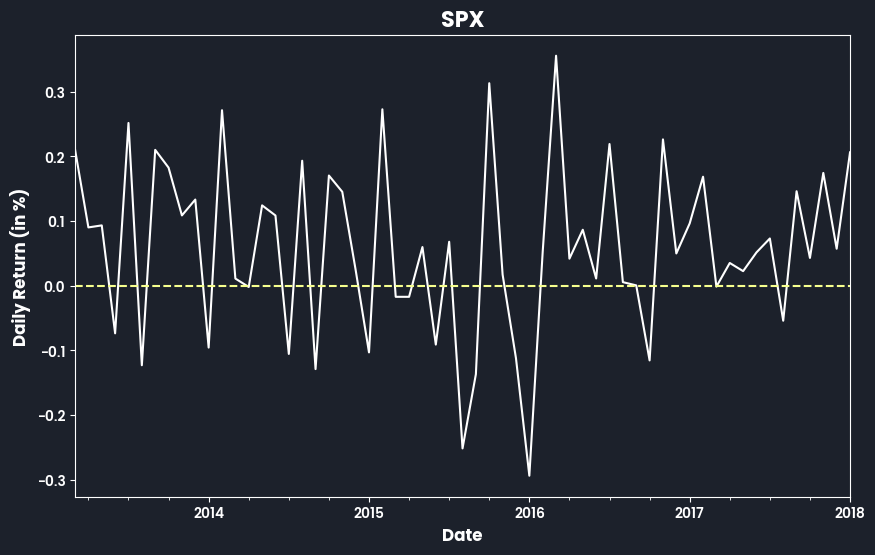

In [232]:
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#1C212B') # set background color of the whole graph

ax = sp_data['Daily return(in %)'].resample('M').mean().iloc[1:-1].plot(kind='line', color='white')
ax.axhline(y=0, color='#F6FF8E', linestyle='--')

plt.title('SPX', fontsize=16, fontfamily='Poppins', fontweight='bold', color='white')
plt.xlabel('Date', fontsize=12, fontfamily='Poppins', fontweight='bold', color='white')
plt.ylabel('Daily Return (in %)', fontsize=12, fontfamily='Poppins', fontweight='bold', color='white')
plt.xticks(fontfamily='Poppins', fontweight='semibold', color='white')
plt.yticks(fontfamily='Poppins', fontweight='semibold', color='white')
plt.gca().set_facecolor('#1C212B')
